In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
concrete = pd.read_excel('concrete_Data.xls')

In [4]:
concrete.columns = ['Cement', 
                    'Blast Furnace Slag', 
                    'Fly Ash', 'Water', 
                    'Superplasticizer', 
                    'Coarse Aggregate',
                    'Fine Aggregate', 
                    'Age',
                    'Compressive Strength']

In [5]:
concrete.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Compressive Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [6]:
concrete.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Compressive Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


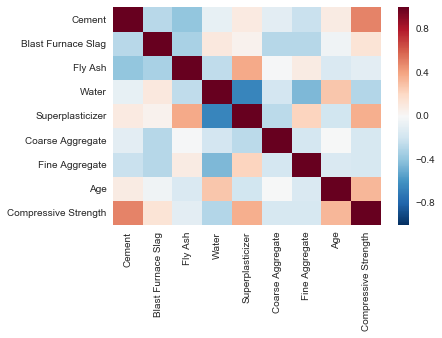

In [7]:
sns.heatmap(concrete.corr())

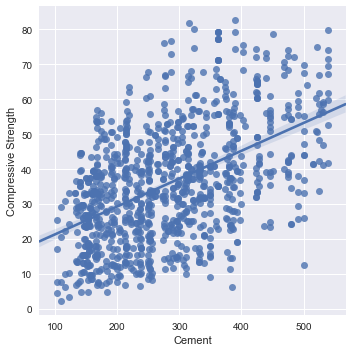

In [40]:
sns.lmplot(x = 'Cement', y = 'Compressive Strength', data = concrete)
#plt.scatter(concrete['Cement'], concrete['Compressive Strength'])

This is a quick scatter plot to show the most correlated input variable to the output variable...as you can see it's a pretty low correlation. 

# Building Models

I'm going to start with every feature being used in the model and take them out one by one(in reverse correlation order) in an attempt to find the best mix.

In [70]:
print(concrete.corr()['Compressive Strength'])

Cement                  0.497833
Blast Furnace Slag      0.134824
Fly Ash                -0.105753
Water                  -0.289613
Superplasticizer        0.366102
Coarse Aggregate       -0.164928
Fine Aggregate         -0.167249
Age                     0.328877
Compressive Strength    1.000000
Name: Compressive Strength, dtype: float64


In order of strength of correlation(highest to lowest):
    Cement
    Superplasticizer
    Age
    Water
    Fine Aggregate
    Coarse Aggregate
    Blast Furnace Slag
    Fly Ash

In [107]:
#Building a Linear Regression model
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

StScale = StandardScaler()

X = concrete[['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 
              'Superplasticizer', 'Coarse Aggregate','Fine Aggregate', 'Age']]
Y = concrete['Compressive Strength']

X_scaled = StScale.fit_transform(X)
Y_scaled = StScale.fit_transform(Y)

regr = linear_model.LinearRegression()
regr.fit(X_scaled,Y_scaled)

print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print('\nR-squared: \n', regr.score(X_scaled,Y_scaled))

Coefficients: 
 [ 0.74935083  0.53633543  0.33689422 -0.19213209  0.10394166  0.0839185
  0.09672711  0.43192631]
Intercept: 
 2.56701955226e-16

R-squared: 
 0.615464734269


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


With all features thrown in the R-Squared is at .615, a significant upgrade from my limited features option

In [108]:
#Building a KNN Regression model
from sklearn import neighbors
from sklearn.model_selection import cross_val_score

knn1 = neighbors.KNeighborsRegressor(n_neighbors = 9, weights = 'distance')
knn.fit(X_scaled,Y_scaled)


score = cross_val_score(knn, X_scaled, Y_scaled, cv=10)
print('R-Squared Value: {} (+/- {})'.format(round(score.mean(),2), round(score.std()*2,2)))


R-Squared Value: 0.37 (+/- 0.95)


With all features thrown in the R-Squared for the KNN model dropped significantly from 0.5 to 0.35. And this was the highest it went after lowering the neighbhors from 10 to 9

### Taking out Fly Ash

In [109]:
X = concrete[['Cement', 'Blast Furnace Slag', 'Water', 
              'Superplasticizer', 'Coarse Aggregate','Fine Aggregate', 'Age']]
Y = concrete['Compressive Strength']

X_scaled = StScale.fit_transform(X)
Y_scaled = StScale.fit_transform(Y)

regr = linear_model.LinearRegression()
regr.fit(X_scaled,Y_scaled)

print('OLS Linear Regression')
print('R-squared: \n', regr.score(X_scaled,Y_scaled))
print('<>'*50)
knn = neighbors.KNeighborsRegressor(n_neighbors = 15, weights = 'distance')
knn.fit(X_scaled,Y_scaled)


score = cross_val_score(knn, X_scaled, Y_scaled, cv=10)
print('KNN Regression')
print('R-Squared Value: \n {} (+/- {})'.format(round(score.mean(),2), round(score.std()*2,2)))

OLS Linear Regression
R-squared: 
 0.597073978884
<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
KNN Regression
R-Squared Value: 
 0.39 (+/- 0.81)


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


When Fly Ash was removed as a feature the OLS model went down in accuracy while the KNN model was able to improve slightly after raising the number of neighbors to 15.

### Taking out Fly Ash and Blast Furnace Slag

In [120]:
X = concrete[['Cement', 'Water', 'Superplasticizer', 
              'Coarse Aggregate','Fine Aggregate', 'Age']]
Y = concrete['Compressive Strength']

X_scaled = StScale.fit_transform(X)
Y_scaled = StScale.fit_transform(Y)

regr = linear_model.LinearRegression()
regr.fit(X_scaled,Y_scaled)

print('OLS Linear Regression')
print('R-squared: \n', regr.score(X_scaled,Y_scaled))
print('<>'*50)
knn = neighbors.KNeighborsRegressor(n_neighbors = 18, weights = 'distance')
knn.fit(X_scaled,Y_scaled)


score = cross_val_score(knn, X_scaled, Y_scaled, cv=10)
print('KNN Regression')
print('R-Squared Value: \n {} (+/- {})'.format(round(score.mean(),2), round(score.std()*2,2)))

OLS Linear Regression
R-squared: 
 0.570613946314
<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
KNN Regression
R-Squared Value: 
 0.43 (+/- 0.67)


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


It is clear that the OLS model will continue to get worse as more features(regardless how of how little they correlate) are taken out. Moving forward I will only continue to alter the KNN model.

Also, in bumping up the n_neighbors to 18 I was able to keep R-Squared the same while lowering the +/- score.

### Taking out Fly Ash, Blast Furnace Slag and Course Aggregate

In [128]:
X = concrete[['Cement', 'Water', 'Superplasticizer',
              'Fine Aggregate', 'Age']]
Y = concrete['Compressive Strength']

X_scaled = StScale.fit_transform(X)
Y_scaled = StScale.fit_transform(Y)

knn = neighbors.KNeighborsRegressor(n_neighbors = 8, weights = 'distance')
knn.fit(X_scaled,Y_scaled)


score = cross_val_score(knn, X_scaled, Y_scaled, cv=10)
print('KNN Regression')
print('R-Squared Value: \n {} (+/- {})'.format(round(score.mean(),2), round(score.std()*2,2)))

KNN Regression
R-Squared Value: 
 0.51 (+/- 0.61)


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


Again the KNN model continues to rise in accuracy(R-Squared) when less correlated features are removed. The accuracy was also able to get up over .5 by lowering the neighbors to 8.

### Taking out Fly Ash, Blast Furnace Slag, Course Aggregate and Fine Aggregate

In [133]:
X = concrete[['Cement', 'Water', 'Superplasticizer', 'Age']]
Y = concrete['Compressive Strength']

X_scaled = StScale.fit_transform(X)
Y_scaled = StScale.fit_transform(Y)

knn = neighbors.KNeighborsRegressor(n_neighbors = 9, weights = 'distance')
knn.fit(X_scaled,Y_scaled)


score = cross_val_score(knn, X_scaled, Y_scaled, cv=10)
print('KNN Regression')
print('R-Squared Value: \n {} (+/- {})'.format(round(score.mean(),2), round(score.std()*2,2)))

KNN Regression
R-Squared Value: 
 0.52 (+/- 0.55)


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


With an increase of one neighbor the R-Squared did rise incrimentally and the +/- was lowered but it was a much less significant rise in R-Squared compared to removal of previous features. 

### Taking out Fly Ash, Blast Furnace Slag, Course and Fine Aggregate and Water

In [142]:
X = concrete[['Cement', 'Superplasticizer', 'Age']]
Y = concrete['Compressive Strength']

X_scaled = StScale.fit_transform(X)
Y_scaled = StScale.fit_transform(Y)

knn = neighbors.KNeighborsRegressor(n_neighbors = 15, weights = 'distance')
knn.fit(X_scaled,Y_scaled)


score = cross_val_score(knn, X_scaled, Y_scaled, cv=10)
print('KNN Regression')
print('R-Squared Value: \n {} (+/- {})'.format(round(score.mean(),2), round(score.std()*2,2)))

KNN Regression
R-Squared Value: 
 0.5 (+/- 0.43)


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


Going back up to 15 neighbors was the only way to get the R-Squared score back up to .5 which means that the 4 features I originally chose were the ideal feature mix for the KNN regression model and any more or less would result in a less effective model.

# Takeways

If looking simply at R-Squared scores, both models were pretty poor predictors of compression strength. That being said the data did me no favors and considering how little correlation even the good features had to the predicted variable they might even be considered strong models. 

When thinking about the differences between these two types of regression models the biggest thing to stand out was how feature number affected the R-Squared. It makes sense for OLS. Even for features that are not super correlated, as long as there is any correlation whatsoever it will make the actual regression line more accurate so it is in the best interest to keep all features in that model. As for the KNN model, when features start to have little or no correlation to the predicted variable the ability for that feature's 'neighbors' to provide a meaningful are lessened. Similarly when you reach the ideal mix of features and then go past that(by adding or removing another feature) it also lowers the predictive power. 

I plotted the R-Squared of both models against the number of features below. It would be interesting to retry this comparison with features I built vs simply using the data as is.

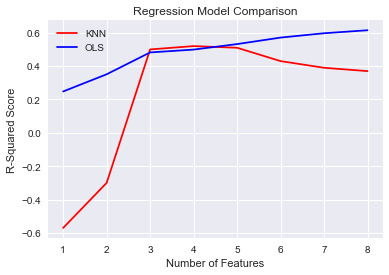

In [157]:
Feats = [1,2,3,4,5,6,7,8]
OLS_R = [.248, .351, .482, .499, .532, .571, .597, .615]
KNN_R = [-.57, -.3, .5, .52, .51, .43, .39, .37]

plt.plot(Feats, KNN_R, color = 'red')
plt.plot(Feats, OLS_R, color = 'blue')
plt.xlabel('Number of Features')
plt.ylabel('R-Squared Score')
plt.legend(['KNN', 'OLS'])
plt.title('Regression Model Comparison')
plt.show()